<a href="https://colab.research.google.com/github/SaadOjo/Circle-Detection/blob/main/Circle_Detection_and_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from keras import backend as K
import matplotlib.pyplot as plt
import cv2
import random


img_shape = (600,800,3)
num_of_classes = 7

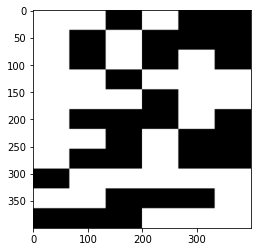

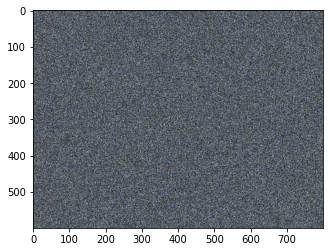

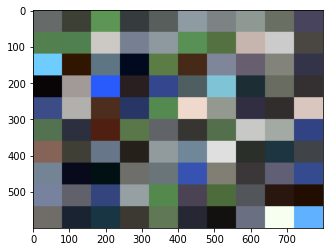

In [3]:
def getImageColors(img):
  return np.unique(img.reshape(-1, img.shape[2]), axis=0)

def generateBackgroundImg(width, height, colors = None, slices = None, display=False):
  '''
  width height

  colors as array of colors for picture 
  if None, default [255,255,255] white

  [ [0], [255] ] - for grayscale images
  [ [0,0,255], [ 0, 255, 0], [255, 0, 0] ] - for 3 channeled one
  
  slices as a tuple (0,3)
  where 0 is amount the image is gonna be splitted vertically
  3 horisontally 

  returns generated image as numpy array
  '''
  if colors is not None:
    colors = np.array(colors)
  else:
    colors = np.array([[255,255,255]]) # white

  if slices:
    if len(colors) < 2: # it supposed to make them use different colors
      colors = np.array([[0,0,0], [255,255,255]]) # black and white
    indices = np.array(range(len(colors)))
    im_indices = np.random.choice(indices, size=(slices[0]+1,slices[1]+1)) #, p=prob
    img = colors[im_indices].astype('uint8') 
    img = cv2.resize(img, (width, height, ), interpolation=cv2.INTER_AREA)

  else:
    indices = np.array(range(len(colors)))
    im_indices = np.random.choice(indices, size=(height,width)) #, p=prob
    img = colors[im_indices].astype('uint8') 

  if display:
    plt.imshow(img)
    plt.show()
  return img

background_img = generateBackgroundImg(800,600, None, (10,5))
background_img = generateBackgroundImg(400,400, None, (10,5), display=True)

img = cv2.imread('./img.jpg')
colors = getImageColors(img)
background_img = generateBackgroundImg(800, 600, colors, display=True)

background_img = generateBackgroundImg(800, 600, colors, (9,9), display=True)


creep_hp_bar_ally


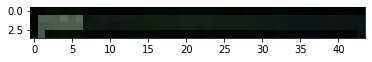

creep_hp_bar_enemy


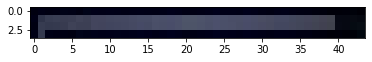

hero_hp_bar_ally


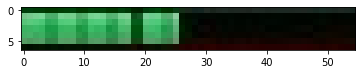

hero_hp_bar_enemy


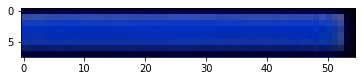

hero_hp_bar_self


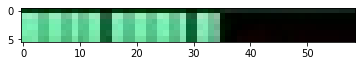

tower_hp_bar_ally


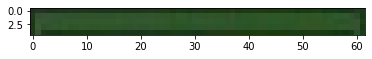

tower_hp_bar_enemy


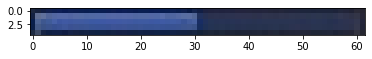

manabars


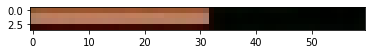

2985

In [4]:
from glob import glob 
data_dir="images" # Directory that will contain all kinds of data (the data we download and the data we generate)
save_to_dir = f'../extracted_images'
convert_to_gray = False
img_paths = []
import random

for folder_path in glob(f"{save_to_dir}/*"):
    for pic_path in glob(folder_path+'/*.jpg'):
        img_paths.append(pic_path)

class ScreenStore:
    def __init__(self, img_paths = img_paths, store_in_ram = True):
        self.img_paths = img_paths
        self.img_count = len(self.img_paths)
        self.store_in_ram = store_in_ram
        self.images = []
        if self.store_in_ram:
            self.loadImages()
    def loadImages(self):
        for path in self.img_paths:
            self.images.append(cv2.imread(path))
    def getRandom(self, display = False, filter_keyword = None, convert_to_gray = convert_to_gray):
        
        if filter_keyword: img_paths = list(filter(lambda el: filter_keyword in el, self.img_paths))
        else: img_paths = self.img_paths

        index_of_image = random.randint(0, len(img_paths) - 1)
        img_path = img_paths[index_of_image]
        pic_class = img_path.split('\\')[-2:-1][0]
        if self.store_in_ram:
            index_of_image_in_ram = self.img_paths.index(img_path)
            pic = self.images[index_of_image_in_ram]
        else:
            pic = cv2.imread(img_path)
        if convert_to_gray: pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        if display:
            print(pic_class)
            plt.imshow(pic)
            plt.show()
        return [pic, pic_class]
screen_store = ScreenStore(img_paths)
_ = screen_store.getRandom(display=True, filter_keyword = 'creep_hp_bar_ally')
_ = screen_store.getRandom(display=True, filter_keyword = 'creep_hp_bar_enemy')
_ = screen_store.getRandom(display=True, filter_keyword = 'hero_hp_bar_ally')
_ = screen_store.getRandom(display=True, filter_keyword = 'hero_hp_bar_enemy')
_ = screen_store.getRandom(display=True, filter_keyword = 'hero_hp_bar_self')
_ = screen_store.getRandom(display=True, filter_keyword = 'tower_hp_bar_ally')
_ = screen_store.getRandom(display=True, filter_keyword = 'tower_hp_bar_enemy')
_ = screen_store.getRandom(display=True, filter_keyword = 'manabars')
len(screen_store.images)

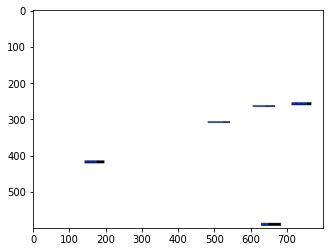

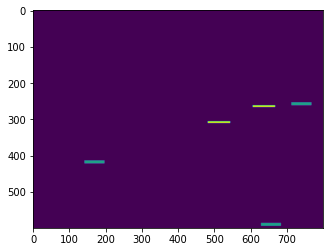

In [7]:
def createDataSample(img, num_shapes = 15, add_similar=False):
  
  height, width = img.shape[:-1]
  label = np.zeros((height, width, 1))
  for _ in range(random.randint(5, num_shapes)):
    class_index = random.randint(1,8)
    if class_index == 1:
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'creep_hp_bar_ally')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [1]
    elif class_index == 2: 
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'creep_hp_bar_enemy')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [2]
    elif class_index == 3: 
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'hero_hp_bar_ally')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [3]
    elif class_index == 4: 
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'hero_hp_bar_enemy')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [4]
    elif class_index == 5: 
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'hero_hp_bar_self')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [5]
    elif class_index == 6: 
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'tower_hp_bar_ally')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [6]
    elif class_index == 7: 
      bar, _ = screen_store.getRandom(display=False, filter_keyword = 'tower_hp_bar_enemy')
      bar_shapes = bar.shape
      x = random.randint(0,width-bar_shapes[1])
      y = random.randint(0,height-bar_shapes[0])
      img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
      label[y:y+bar_shapes[0], x:x+bar_shapes[1]] = [7]
    else:
      if add_similar is True:
        bar, _ = screen_store.getRandom(display=False, filter_keyword = 'manabars')
        bar_shapes = bar.shape
        x = random.randint(0,width-bar_shapes[1])
        y = random.randint(0,height-bar_shapes[0])
        img[y:y+bar_shapes[0], x:x+bar_shapes[1]] = bar
  return img, label

background_img = generateBackgroundImg(800,600, None,(1,1))
# background_img = generateBackgroundImg(800,600, None, (0,1))
img, label = createDataSample( background_img, 10)
plt.imshow(img);plt.show()
plt.imshow(label);plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K


In [9]:

class DataGenerator(keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, data= None, num_of_samples_per_batch = 5, shuffle = True):
    'Initialization'
    self.num_of_samples_per_batch = num_of_samples_per_batch
    self.data = data
    self.data_len = len(data)
    self.last_object_index = 0
    self.shuffle = shuffle

  def getObject(self, index):
    data = self.data[index]
    return data

  def __len__(self):
    'Denotes the number of batches per epoch'
    # return int(self.data_len)
    return int(self.data_len / self.num_of_samples_per_batch)

  def __getitem__(self, idx= None):
    'Generate one batch of data'
    x_list = []
    y_list = []
    
    idx = self.num_of_samples_per_batch * idx
    for i in range(self.num_of_samples_per_batch):
      # print(idx)
      index =  idx + i
      inputs, predictions  = self.getObject(index)
      x_list.append(inputs)
      y_list.append(predictions)


    x_list = np.array(x_list) # input
    y_list = np.array(y_list) # output
    
    return x_list, y_list # input, output
  def on_epoch_end(self):
    if self.shuffle:
      random.shuffle(self.data)

In [46]:
training_data = []
img = cv2.imread('./img.jpg')
colors = getImageColors(img)
for i in range(300):
  background_img = generateBackgroundImg(800,600, colors)
  training_data.append(createDataSample( background_img, 10, add_similar=True))
for i in range(300):
  background_img = generateBackgroundImg(800,600, None, (1,1))
  training_data.append(createDataSample( background_img, 10, add_similar=True))
for i in range(300):
  background_img = generateBackgroundImg(800,600, colors, (100,100))
  training_data.append(createDataSample( background_img, 10, add_similar=True))

validation_data = []
for i in range(50):
  background_img = generateBackgroundImg(800,600, [[0,0,0], [255,255,255]])
  validation_data.append(createDataSample( background_img, 10, add_similar=True))

training_generator = DataGenerator(training_data,4)
validation_generator = DataGenerator(validation_data,1)

In [22]:
keras.backend.clear_session()
# l2 = None
l2 = keras.regularizers.l2(1e-5)
inputs = keras.Input(shape=img_shape)
x = keras.layers.Rescaling(1./255)
x = keras.layers.Conv2D(32,3,padding='same',kernel_regularizer=l2)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(64,3,padding='same',kernel_regularizer=l2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(128,3,padding='same',kernel_regularizer=l2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
outputs = keras.layers.Conv2D(num_of_classes+1, 3, activation="softmax", padding="same",kernel_regularizer=l2)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()






# 44s 1s for step

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600, 800, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 600, 800, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 600, 800, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 600, 800, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 600, 800, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 600, 800, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 600, 800, 64)      0     

In [48]:



opt = keras.optimizers.Adam(learning_rate=0.00001)
#https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other
# loss = keras.losses.BinaryCrossentropy()
# loss = keras.losses.CategoricalCrossentropy(from_logits=True)
# loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer=opt,loss=loss)


callbacks = [
  # keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),
  keras.callbacks.ModelCheckpoint("detecting_all_bars_experimental2.h5", save_best_only=False)
]
# model.fit_generator(imageLoader(fileList,batch_size),steps_per_epoch=..., epochs=..., ...)
model.fit(training_generator, validation_data=validation_generator,epochs=3, callbacks=callbacks)





Epoch 1/3
225/225 [==============================] - 34s 145ms/step - loss: 0.0145 - val_loss: 0.1407
Epoch 2/3
225/225 [==============================] - 32s 143ms/step - loss: 0.0116 - val_loss: 0.1185
Epoch 3/3
225/225 [==============================] - 32s 143ms/step - loss: 0.0104 - val_loss: 0.0898


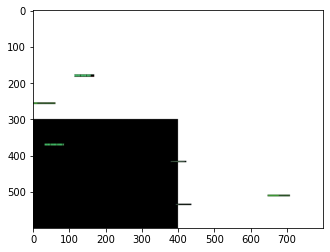

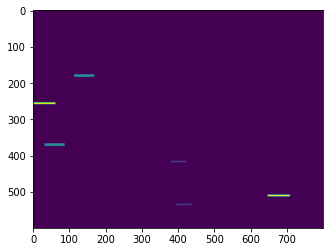

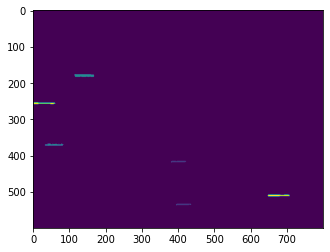

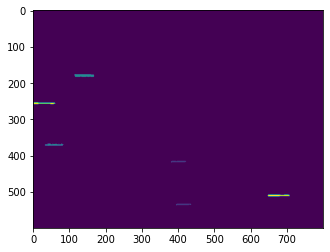

In [50]:
background_img = generateBackgroundImg(800,600, None, (1,1))
# background_img = generateBackgroundImg(800,600, colors, (1,1))

img, label = createDataSample( background_img, 10)
plt.imshow(img);plt.show()
plt.imshow(label);plt.show()
# for i in range(label.shape[2]):
#     temp_label = label.copy()
#     temp_label = label[:,:,i]
#     print(i)
#     plt.imshow(temp_label);plt.show()
img = cv2.imread('./img.jpg')
y_pred = model.predict(np.expand_dims(img,0))
y_pred = np.squeeze(y_pred)
mask = np.argmax(y_pred, axis=-1)
plt.imshow(mask);plt.show()
mask = np.expand_dims(mask, axis=-1)
plt.imshow(mask);plt.show()


In [9]:
model = keras.models.load_model(
    './detecting_all_bars_experimental2.h5', custom_objects=None, compile=False, options=None
)

In [ ]:
model = keras.models.load_model(
    './detecting_all_bars_segmentation_working.h5', custom_objects=None, compile=True, options=None
)

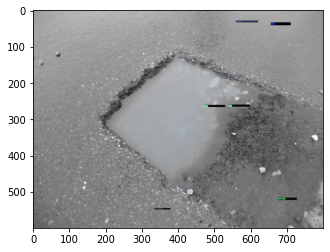

0


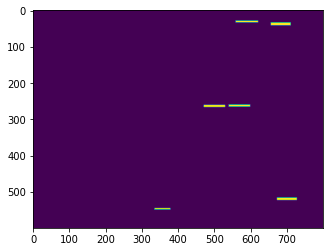

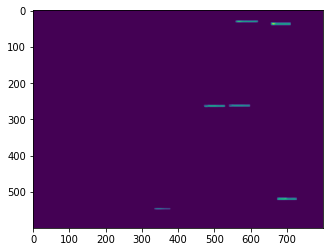

In [14]:
import PIL
img, label = createDataSample(img_shape[0], img_shape[1], True,10)
plt.imshow(img);plt.show()
for i in range(label.shape[2]):
    temp_label = label.copy()
    temp_label = label[:,:,i]
    print(i)
    plt.imshow(temp_label);plt.show()

y_pred = model.predict(np.expand_dims(img,0))
y_pred = np.squeeze(y_pred)
y_pred.shape
plt.imshow(y_pred)
# for i in range(y_pred.shape[2]):
#     layer = y_pred[:,:,i]
#     solutions = np.argwhere(layer == 1)
#     print(solutions)
# y_pred = np.argmax(y_pred, axis=2)

# for i in range(1,8):
#     thresh = np.where(y_pred == i,y_pred,0)
#     plt.imshow(thresh);plt.show()


0.02998208999633789


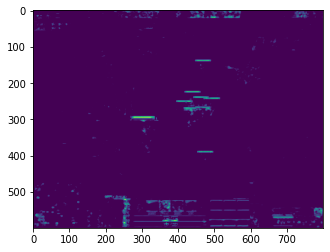

In [18]:
import time
img = cv2.imread('./images_for_test/pic_0.jpg')
img = np.expand_dims(img,0)
t1 = time.time()
# y_pred = model.predict(img) # 0.08
# y_pred = model(img, training=False) # 0.007


# @tf.function(experimental_relax_shapes=False)
# def pred(x):
#     return model(img, training=False)

# # y_pred = pred(img) # 1.17


y_pred = model(img, training=False) # 0.007

t2 = time.time() - t1
print(t2)
y_pred = np.squeeze(y_pred)
plt.imshow(y_pred)
# y_pred = np.argmax(y_pred, axis=1)

# for i in range(1,8):
#     thresh = np.where(y_pred == i,y_pred,0)
#     plt.imshow(thresh);plt.show()


(1, 600, 800, 1)


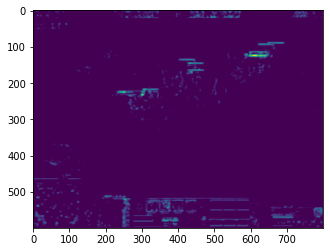

In [17]:
def _nms(heat, kernel=2):
  hmax = K.pool2d(heat, (kernel, kernel), padding='same', pool_mode='max')
  return hmax
  # keep = K.cast(K.equal(hmax, heat), K.floatx())
  # return heat * keep

img = cv2.imread('./images_for_test/pic_7.jpg')
img = np.expand_dims(img,0)
y_pred = model(img, training=False) # 0.007
print(y_pred.shape)
ZZX = _nms(y_pred)
ZZX = np.squeeze(ZZX)
plt.imshow(ZZX)

In [ ]:
y_pred[150,300]

array([0.24725883, 0.5726854 , 0.18005572], dtype=float32)

In [ ]:
model = 
